# WK6 DATA VISUALIZATION <hr style = "border:2px solid green">

Name: **Chrsitian Jade Aguilar** <br>
Course: **CPE2A**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [3]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


In [4]:
#copy of the dataset
df_w = df.copy()

## Chips manufactured 

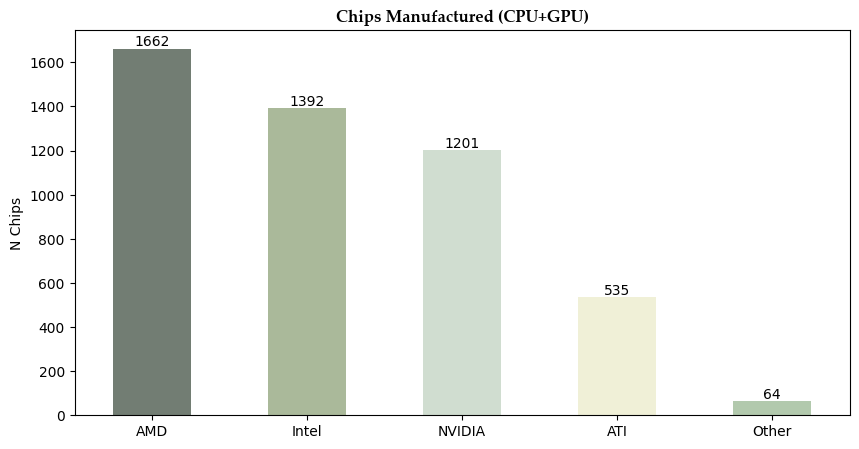

In [5]:
chip_count = df_w['Vendor'].value_counts()
chart = chip_count.plot(kind='bar',
                        color = ['#727D73','#AAB99A','#D0DDD0','#F0F0D7','#B2C9AD'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

## GPU and CPU proccesor size trend

**GPU**

In [6]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps['Date'] = pd.to_datetime(df_ps['Date']) 
df_ps['Year'] = df_ps['Date'].dt.year
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


Text(0, 0.5, 'nm')

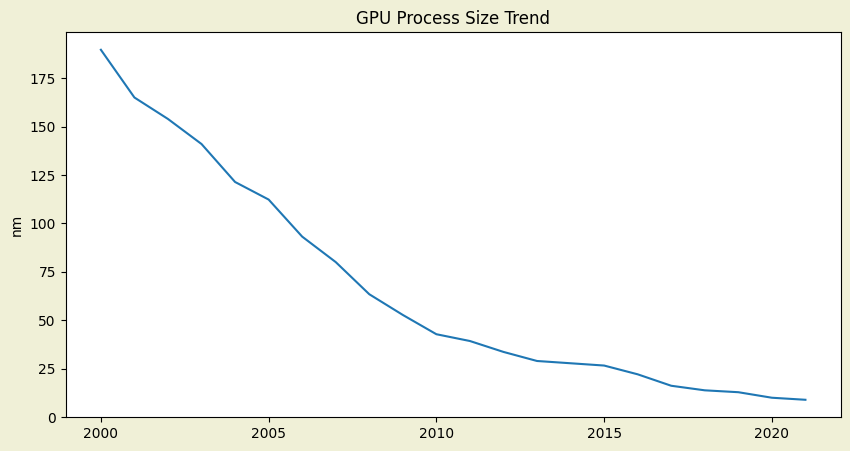

In [7]:
plt.figure(facecolor = '#F0F0D7',figsize=(10,5))
plt.plot(df_ps['Year'],df_ps['Process_Size'])
plt.title('GPU Process Size Trend')
plt.ylabel('nm')

**CPU**

In [8]:
df_cpu_ps = df[['Type', 'Date', 'Process_Size']].where(df['Type'] == 'CPU').dropna()
df_cpu_ps['Date'] = pd.to_datetime(df_cpu_ps['Date'])
df_cpu_ps['Year'] = df_cpu_ps['Date'].dt.year
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps.rename(columns={'Process_Size': 'CPU_Process_Size'}, inplace=True)
df_cpu_ps

,Year,CPU_Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Text(0, 0.5, 'nm')

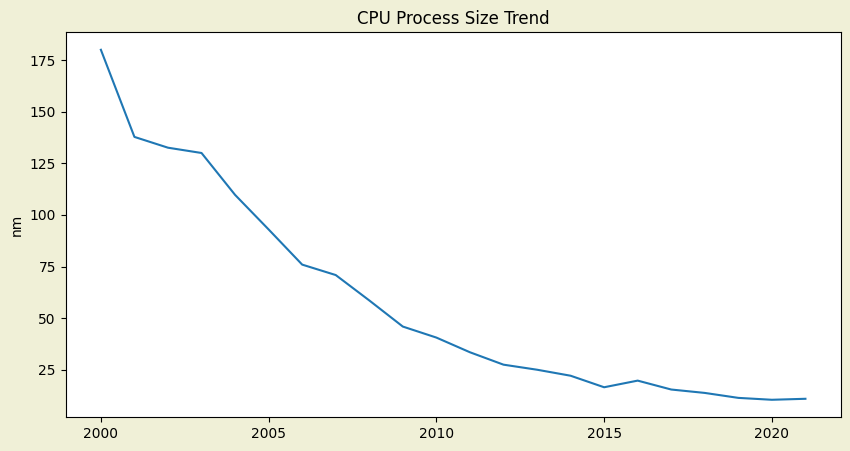

In [9]:
plt.figure(facecolor = '#F0F0D7',figsize=(10,5))
plt.plot(df_cpu_ps['Year'],df_cpu_ps['CPU_Process_Size'])
plt.title('CPU Process Size Trend')
plt.ylabel('nm')

Combined Processsor Size trend(GPU AND CPU)

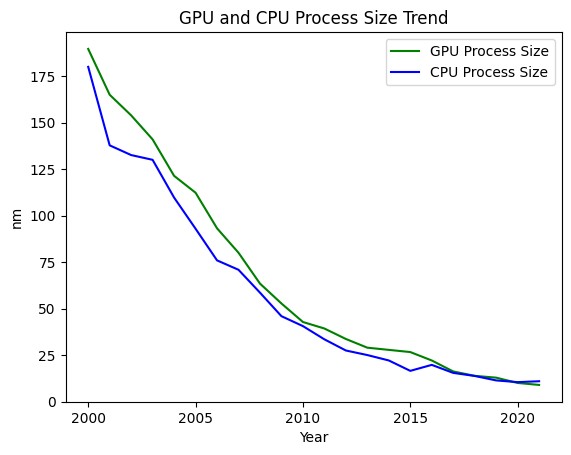

In [10]:
plt.plot(df_ps['Year'], df_ps['Process_Size'], color='green', label='GPU Process Size')
plt.plot(df_cpu_ps['Year'], df_cpu_ps['CPU_Process_Size'], color='blue', label='CPU Process Size')
plt.title('GPU and CPU Process Size Trend')
plt.ylabel('nm')
plt.xlabel('Year')
plt.legend()
plt.show()

**Hypothesis** <br>
Over the years, CPU and GPU process sizes have shrunk, making processors faster and more efficient. Smaller sizes reduce signal travel distance, lower power consumption, and improve thermal performance. They also allow for more transistors, enabling powerful features while cutting costs by increasing chip production per silicon wafer.

## GPU and CPU Die Size Trend

**GPU**

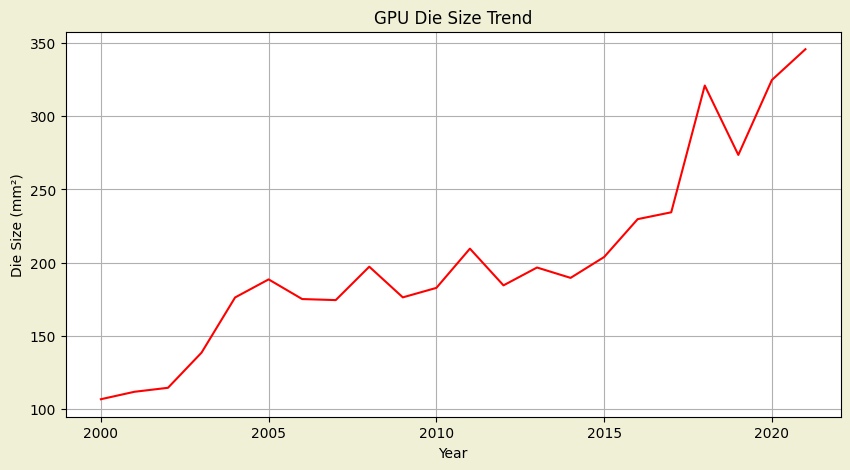

In [11]:
# Filter GPU data and select relevant columns
df_ds = df_w[['Type', 'Date', 'Die_Size']].where(df_w['Type'] == 'GPU').dropna()

# Convert Date column to datetime and extract Year
df_ds['Date'] = pd.to_datetime(df_ds['Date'])
df_ds['Year'] = df_ds['Date'].dt.year

# Group by Year and calculate the average Die Size per year
df_ds = df_ds.groupby('Year')['Die_Size'].mean().reset_index()

# Plot the GPU Die Size trend
plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_ds['Year'], df_ds['Die_Size'], color='red', marker='', linestyle='-')

# Add labels and title
plt.title('GPU Die Size Trend')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.grid(True)
plt.show()

**CPU**

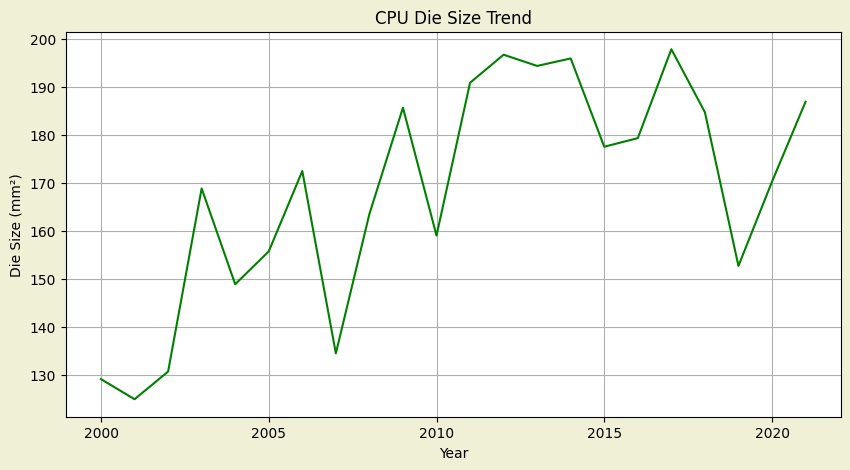

In [12]:
# Filter CPU data and select relevant columns
df_cpu_ds = df_w[['Type', 'Date', 'Die_Size']].where(df_w['Type'] == 'CPU').dropna()

# Convert Date column to datetime and extract Year
df_cpu_ds['Date'] = pd.to_datetime(df_cpu_ds['Date'])
df_cpu_ds['Year'] = df_cpu_ds['Date'].dt.year

# Group by Year and calculate the average Die Size per year
df_cpu_ds = df_cpu_ds.groupby('Year')['Die_Size'].mean().reset_index()

# Plot the CPU Die Size trend
plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_cpu_ds['Year'], df_cpu_ds['Die_Size'], color='green', marker='', linestyle='-')

# Add labels and title
plt.title('CPU Die Size Trend')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.grid(True)
plt.show()


**Combined**

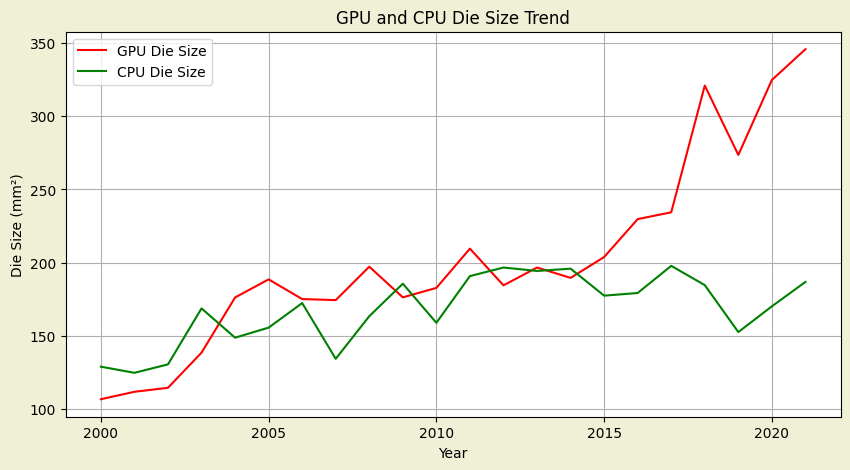

In [13]:
# Merge the GPU and CPU die size data on the 'Year' column
df_combined = pd.merge(df_ds, df_cpu_ds, on='Year', how='inner', suffixes=('_GPU', '_CPU'))

# Plot the combined GPU and CPU Die Size trends
plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_combined['Year'], df_combined['Die_Size_GPU'], color='red', marker='', linestyle='-', label='GPU Die Size')
plt.plot(df_combined['Year'], df_combined['Die_Size_CPU'], color='green', marker='', linestyle='-', label='CPU Die Size')

# Add labels, title, and legend
plt.title('GPU and CPU Die Size Trend')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()
plt.grid(True)
plt.show()

**Hypothesis** <br>
GPU chip sizes have grown significantly larger over time, indicating a focus on increasing processing power for graphics. CPU die size growth has been much more modest. This difference reflects differing design priorities and technological advancements in the respective fields.

## GPU and CPU Transistor count Trend

**GPU**

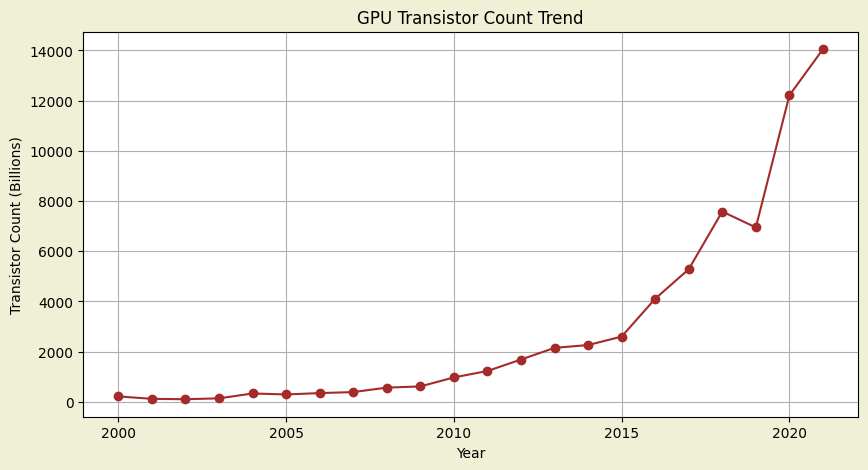

In [14]:
# Filter GPU data and select relevant columns
df_t = df_w[['Type', 'Date', 'Transistors']].where(df_w['Type'] == 'GPU').dropna()

# Convert Date column to datetime and extract Year
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_t['Year'] = df_t['Date'].dt.year

# Group by Year and calculate the average Transistor count per year
df_t = df_t.groupby('Year')['Transistors'].mean().reset_index()

# Plot the GPU Transistor count trend
plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_t['Year'], df_t['Transistors'], color='brown', marker='o', linestyle='-')

# Add labels and title
plt.title('GPU Transistor Count Trend')
plt.xlabel('Year')
plt.ylabel('Transistor Count (Billions)')
plt.grid(True)
plt.show()

**CPU**

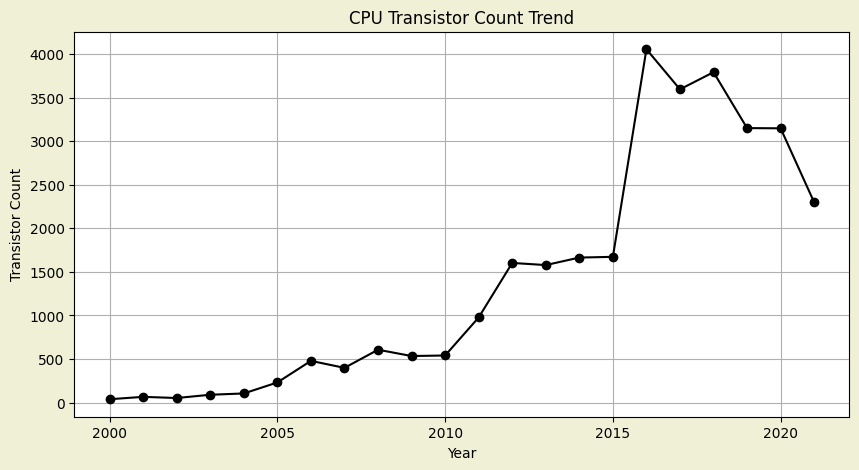

In [15]:
# Filter CPU data and select relevant columns
df_cpu_t = df_w[['Type', 'Date', 'Transistors']].where(df_w['Type'] == 'CPU').dropna()

# Convert Date column to datetime and extract Year
df_cpu_t['Date'] = pd.to_datetime(df_cpu_t['Date'])
df_cpu_t['Year'] = df_cpu_t['Date'].dt.year

# Group by Year and calculate the average Transistor count per year
df_cpu_t = df_cpu_t.groupby('Year')['Transistors'].mean().reset_index()

# Plot the CPU Transistor count trend
plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_cpu_t['Year'], df_cpu_t['Transistors'], color='black', marker='o', linestyle='-')

# Add labels and title
plt.title('CPU Transistor Count Trend')
plt.xlabel('Year')
plt.ylabel('Transistor Count')
plt.grid(True)
plt.show()

**Combined**

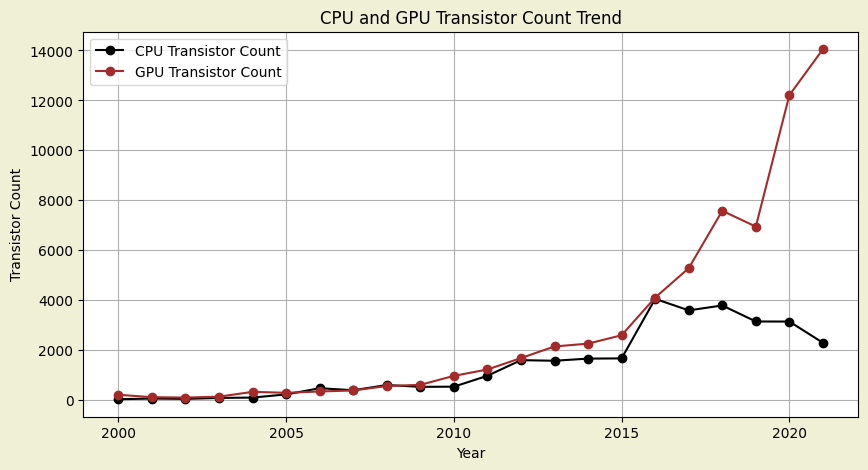

In [16]:
# Merge the CPU and GPU transistor count data on the 'Year' column
df_combined = pd.merge(df_cpu_t, df_t, on='Year', how='inner', suffixes=('_CPU', '_GPU'))

# Plot the combined CPU and GPU Transistor count trends
plt.figure(facecolor='#F0F0D7', figsize=(10, 5))
plt.plot(df_combined['Year'], df_combined['Transistors_CPU'], color='black', marker='o', linestyle='-', label='CPU Transistor Count')
plt.plot(df_combined['Year'], df_combined['Transistors_GPU'], color='brown', marker='o', linestyle='-', label='GPU Transistor Count')

# Add labels, title, and legend
plt.title('CPU and GPU Transistor Count Trend')
plt.xlabel('Year')
plt.ylabel('Transistor Count')
plt.legend()
plt.grid(True)
plt.show()

 The graph depicts the transistor count trends for CPUs and GPUs from 2000 to 2020. Both show an increase, but GPU transistor counts demonstrate significantly faster growth, especially after 2015, surpassing CPU growth considerably.

 **Hypothesis** <br>
 The data strongly suggests that GPU technology has experienced a more rapid advancement in processing power (as measured by transistor count) than CPU technology over the period 2000-2020. This likely reflects the differing architectural designs and application demands of CPUs and GPUs.
 

## Average frequency for every manufacturer

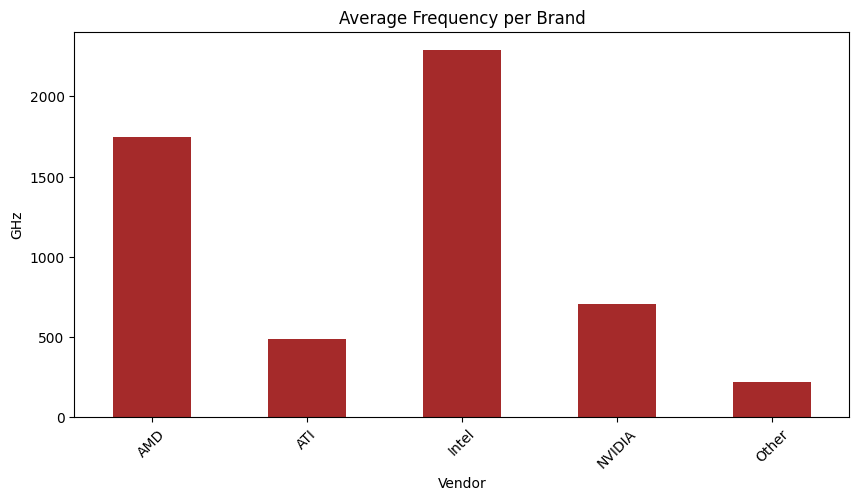

In [17]:
plt.figure(figsize=(10,5))
df.groupby('Vendor')['Frequency'].mean().plot(kind='bar', color='brown')
plt.title("Average Frequency per Brand")
plt.ylabel("GHz")
plt.xticks(rotation=45)
plt.show()

The graph suggests that Intel processors, on average, have a much higher clock speed (frequency) than processors from AMD, ATI, NVIDIA, and other brands. AMD processors show a higher average frequency than ATI, NVIDIA, and the "Other" category. This indicates a potential performance difference, with Intel processors potentially offering higher processing speeds, although other factors beyond clock speed influence overall performance.

## The Relevance of Transistor count and Frequency of every Vendors

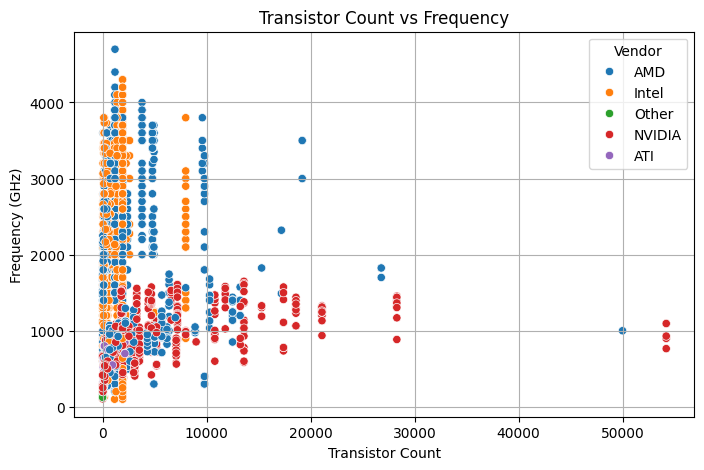

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Transistors'], y=df['Frequency'], hue=df['Vendor'])
plt.title("Transistor Count vs Frequency")
plt.xlabel("Transistor Count")
plt.grid(True)
plt.ylabel("Frequency (GHz)")
plt.show()

The plot suggests a general positive correlation between transistor count and frequency, meaning that processors with more transistors tend to have higher frequencies. However, the relationship is not perfectly linear, and there's significant scatter in the data, indicating other factors influence processor frequency besides transistor count. The data also shows that different vendors have different distributions of transistor counts and frequencies.

## The correlation of TDP and Frequency of every vendors


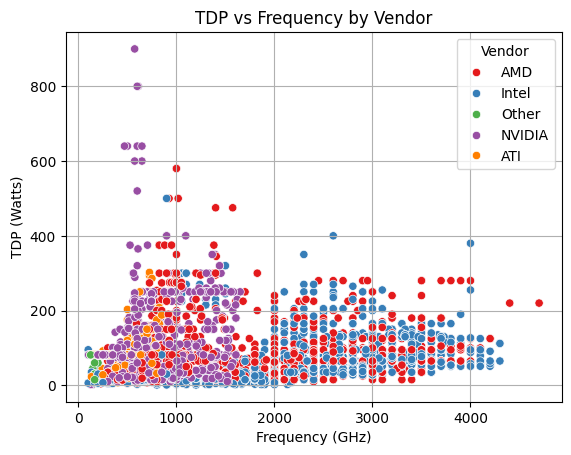

In [19]:
sns.scatterplot(data=df_w, x='Frequency', y='TDP', hue='Vendor', palette='Set1')
plt.title('TDP vs Frequency by Vendor')
plt.xlabel('Frequency (GHz)')
plt.ylabel('TDP (Watts)')
plt.grid(True)
plt.show()


The plot generally shows a positive correlation between TDP and frequency: higher-frequency processors tend to have higher TDPs. This is expected, as higher frequencies require more power. However, the relationship isn't strictly linear; there's considerable scatter, suggesting other factors influence TDP besides frequency. 

## TDP trends over time of every Vendors

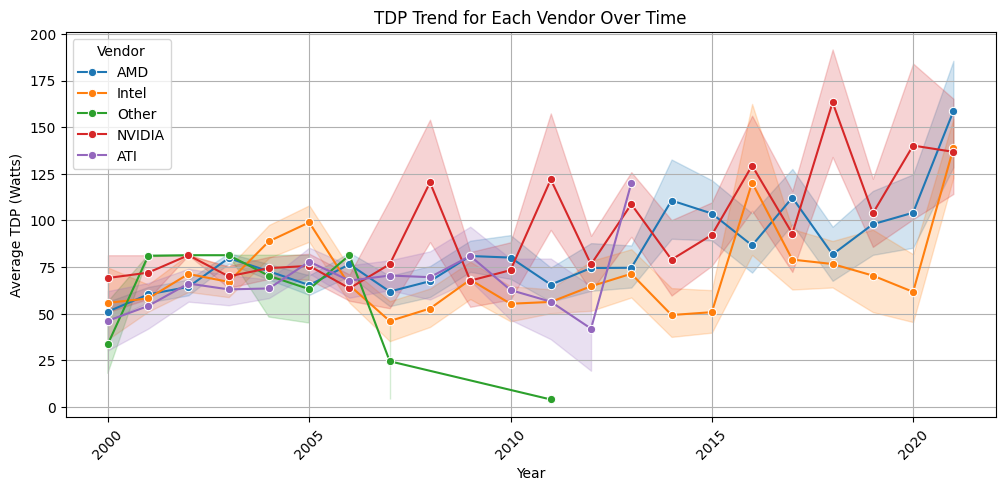

In [20]:
df_w['Date'] = pd.to_datetime(df_w['Date'])

# Extract the Year from the Date column
df_w['Year'] = df_w['Date'].dt.year

# Plot the TDP trend for every vendor over time using lineplot with 'hue'
plt.figure(figsize=(12, 5))
sns.lineplot(data = df_w, x='Year', y='TDP', hue='Vendor', marker='o')

# Add title and labels
plt.title('TDP Trend for Each Vendor Over Time')
plt.xlabel('Year')
plt.ylabel('Average TDP (Watts)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate year labels if necessary
plt.legend(title='Vendor')
plt.show()


The line graph reveals fluctuating average TDPs for processors across different vendors from 2000 to 2020. There's no single consistent upward or downward trend; instead, yearly variations are observed, likely due to a combination of factors like architectural changes and manufacturing improvements. Each vendor exhibits unique TDP patterns, highlighting the diverse approaches to processor design and power management.